<h1>Soal 1: Pemahaman</h1>

1. Sebutkan apa saja yang termasuk preprocessing data!
2. Jelaskan beberapa cara imputing missing value!
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

Jawab:
1. Encoding Categorical Data, Imputing Missing Value, Feature Centering and Scaling
2. 1. Drop missing value
   2. Filling with mean/median
   3. Filling with modus
   4. Filling with bfill atau ffill
   5. KNN
3. Ketika algoritma machine learning yang kita gunakan bersifat distance based
4. Data science workflow terdiri dari beberapa proses penting, yaitu:
  1. Akses sumber data
  2. Data processing
  3. Modelling
  4. Deployment
  5. Monitoring

---

<h1>Soal 2: Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data [titanic.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data [titanic_test.csv](https://drive.google.com/uc?export=download&id=15-XQkmqj2UlFQH7rASJH1oxWST6o9mbm) untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit

![alt text](https://drive.google.com/uc?id=1SyflO2YeuCdYhxwPF6CAtMeaNN1qTaFx)

In [ ]:
# Code here
import pandas as pd
import numpy as np

df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df=df.drop(['Cabin', 'Name', 'Ticket','PassengerId'], axis=1)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Age']=df['Age'].astype(int)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,29,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [ ]:
df['Embarked']=df['Embarked'].fillna(method='bfill')

In [ ]:
df=pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [ ]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22,1,0,7.2500,0,1,0,0,1
1,1,1,38,1,0,71.2833,1,0,1,0,0
2,1,3,26,0,0,7.9250,1,0,0,0,1
3,1,1,35,1,0,53.1000,1,0,0,0,1
4,0,3,35,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,0,0,13.0000,0,1,0,0,1
887,1,1,19,0,0,30.0000,1,0,0,0,1
888,0,3,29,1,2,23.4500,1,0,0,0,1
889,1,1,26,0,0,30.0000,0,1,1,0,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

x = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=10)

In [ ]:
model_knn=KNeighborsClassifier()

In [ ]:
def train_model(k,w):
    model_knn = KNeighborsClassifier(n_neighbors=k, weights=w)
    model_knn.fit(x_train, y_train)
    model_knn.predict(x_test)
    return model_knn.score(x_test, y_test)

list_uniform = []
list_distance = []
for k in range(5, 50, 1):
  list_uniform.append(train_model(k,'uniform'))
  list_distance.append(train_model(k,'distance'))

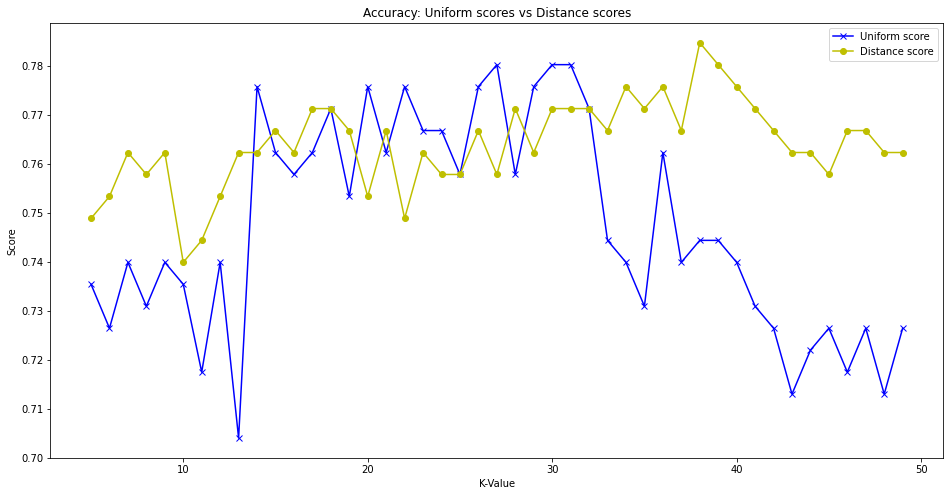

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))

k = range(5,50,1)
ax.plot(k, list_uniform, marker='x',color='b', label='Uniform score')
ax.plot(k, list_distance, marker='o',color='y', label='Distance score')
ax.set_xlabel('K-Value')
ax.set_ylabel('Score')
ax.set_title('Accuracy: Uniform scores vs Distance scores')
plt.legend()
plt.show()

In [ ]:
parapara = {'n_neighbors': np.arange(5, 50), 'weights':['distance', 'uniform']}
gscv = GridSearchCV(model_knn, param_grid=parapara, scoring='roc_auc', cv=5)
gscv.fit(x, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [ ]:
gscv.best_params_

{'n_neighbors': 29, 'weights': 'distance'}

In [ ]:
model_knn=KNeighborsClassifier(n_neighbors=29, weights='distance')

In [ ]:
model_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=29, p=2,
                     weights='distance')

In [ ]:
y_pred=model_knn.predict(x_test)

In [ ]:
gscv.best_score_

0.7648492385313992

In [ ]:
x.shape

(891, 10)